In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/final_model_dataset_v2.csv")

In [3]:
df.head()

,cation,cation_ion_name,anion,anion_ion_name,anion_num_Ac,anion_num_Ag,anion_num_Al,anion_num_Am,anion_num_Ar,anion_num_As,...,Pressure_kPa,anion_Dipole_Moment_Debye,anion_Energy_Hartree,anion_HOMO_Eh,anion_LUMO_Eh,cation_Dipole_Moment_Debye,cation_Energy_Hartree,cation_HOMO_Eh,cation_LUMO_Eh,CO2_solubility
0,[(ETO)2IM],"1,3-diethoxyimidazolium",[Tf2N],bis(trifluoromethylsulfonyl)amide,0,0,0,0,0,0,...,22330.0,0.0,-1827.197242,0.373062,0.122538,0.0,-534.028453,-0.416496,-0.216006,0.778
1,[(ETO)2IM],"1,3-diethoxyimidazolium",[Tf2N],bis(trifluoromethylsulfonyl)amide,0,0,0,0,0,0,...,10340.0,0.0,-1827.197242,0.373062,0.122538,0.0,-534.028453,-0.416496,-0.216006,0.712
2,[(ETO)2IM],"1,3-diethoxyimidazolium",[Tf2N],bis(trifluoromethylsulfonyl)amide,0,0,0,0,0,0,...,7510.0,0.0,-1827.197242,0.373062,0.122538,0.0,-534.028453,-0.416496,-0.216006,0.554
3,[(ETO)2IM],"1,3-diethoxyimidazolium",[Tf2N],bis(trifluoromethylsulfonyl)amide,0,0,0,0,0,0,...,7110.0,0.0,-1827.197242,0.373062,0.122538,0.0,-534.028453,-0.416496,-0.216006,0.626
4,[(ETO)2IM],"1,3-diethoxyimidazolium",[Tf2N],bis(trifluoromethylsulfonyl)amide,0,0,0,0,0,0,...,5250.0,0.0,-1827.197242,0.373062,0.122538,0.0,-534.028453,-0.416496,-0.216006,0.396


In [4]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
# Columns to ignore for features and target column
ignore_cols = ["cation", "cation_ion_name", "anion", "anion_ion_name"]
target_col = "CO2_solubility"

In [6]:
feature_cols = [col for col in df.columns if col not in ignore_cols + [target_col]]
X = df[feature_cols].values
y = df[target_col].values

In [7]:
# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [9]:
import tensorflow.keras.backend as K
import tensorflow as tf

def r2_keras(y_true, y_pred):
    ss_res = K.sum(K.square(y_true - y_pred))
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - ss_res / (ss_tot + K.epsilon())

In [10]:
# Define a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Regression output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/Users/ragilzakaria/.pyenv/versions/3.11.1/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32
)

# The model is now trained and validation metrics are tracked in history

Epoch 1/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0130 - mae: 0.0805 - val_loss: 0.0041 - val_mae: 0.0449
Epoch 2/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037 - mae: 0.0413 - val_loss: 0.0024 - val_mae: 0.0327
Epoch 3/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - loss: 0.0021 - mae: 0.0330 - val_loss: 0.0019 - val_mae: 0.0309
Epoch 4/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 - mae: 0.0320 - val_loss: 0.0016 - val_mae: 0.0282
Epoch 5/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 0.0020 - mae: 0.0304 - val_loss: 0.0017 - val_mae: 0.0287
Epoch 6/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 0.0018 - mae: 0.0285 - val_loss: 0.0014 - val_mae: 0.0259
Epoch 7/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 0.0015 - mae: 0.0268 - val_loss: 0.0016 - val_mae: 0.0271
Epoch 8/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 0.0015 - mae: 0.0270 - val_loss: 0.0022 - val_mae: 0.0323
Epoch 9/100
282/282 ━━━━━━━━━━━━━━━━━━

In [12]:
%matplotlib inline

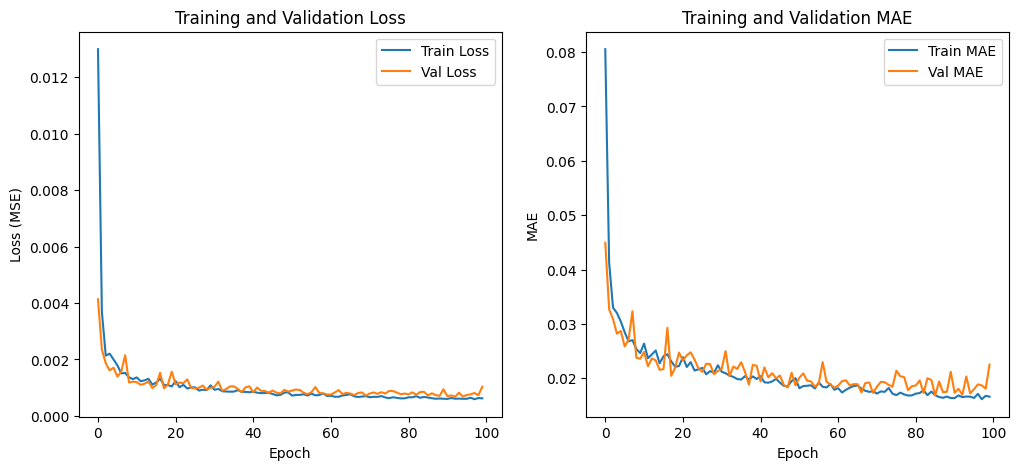

In [13]:
import matplotlib.pyplot as plt

# Assume history is from model.fit(...)
history_dict = history.history

# Plot training & validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

# Plot training & validation MAE
plt.subplot(1, 2, 2)
plt.plot(history_dict['mae'], label='Train MAE')
plt.plot(history_dict['val_mae'], label='Val MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
import numpy as np

# Take a small random sample from validation data for testing
num_test_samples = 5
test_samples = X_val[:num_test_samples]  # Or use np.random.choice for random samples
test_targets = y_val[:num_test_samples]

# Run model predictions on the test samples
predictions = model.predict(test_samples)

# Inverse transform the test samples back to original scale
test_samples_original = scaler.inverse_transform(test_samples)


threshold = 1e-6

for i in range(num_test_samples):
    print(f"Sample {i+1}:")
    for col_name, value in zip(feature_cols, test_samples_original[i]):
        if (col_name.startswith("cation") or col_name.startswith("anion")) and abs(value) < threshold:
            continue
        display_value = 0 if abs(value) < threshold else value
        print(f"  {col_name}: {display_value}")
    print("Predicted CO2_solubility:", predictions[i][0])
    print("Actual CO2_solubility:", test_targets[i])
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Sample 1:
  anion_num_C: 2.0
  anion_num_F: 6.0
  anion_num_N: 1.0
  anion_num_O: 4.0
  anion_num_S: 2.0
  cation_num_C: 8.0
  cation_num_H: 15.0
  cation_num_N: 2.0
  Temperature_K: 293.35
  Pressure_kPa: 1070.0
  anion_Energy_Hartree: -1827.197242480345
  anion_HOMO_Eh: 0.373062
  anion_LUMO_Eh: 0.122538
  cation_Dipole_Moment_Debye: 1.958656135
  cation_Energy_Hartree: -423.042616964063
  cation_HOMO_Eh: 0.418587
  cation_LUMO_Eh: -0.20554
Predicted CO2_solubility: 0.2917347
Actual CO2_solubility: 0.3103

Sample 2:
  anion_num_C: 1.0
  anion_num_H: 1.0
  anion_num_O: 2.0
  cation_num_C: 3.0
  cation_num_H: 10.0
  cation_num_N: 1.0
  cation_num_O: 1.0
  Temperature_K: 343.29
  Pressure_kPa: 6576.000000000001
  anion_Energy_Hartree: -189.179460746558
  anion_HOMO_Eh: 0.01478299999999999
  anion_LUMO_Eh: 0.23993
  cation_Energy_Hartree: -250.001648103974
  cation_HOMO_Eh: 0.144156
  cation_LUMO_Eh: -0.152573
Predicted CO2_solubility: 0.23205301
Act

In [25]:
from sklearn.metrics import r2_score, mean_absolute_error

# Predict on validation data
y_pred = model.predict(X_val).flatten()

# Calculate R² score
r2 = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
print("MAE on validation set:", mae)
print("R² score on validation set:", r2)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
MAE on validation set: 0.022511374460869725
R² score on validation set: 0.9799817696916608


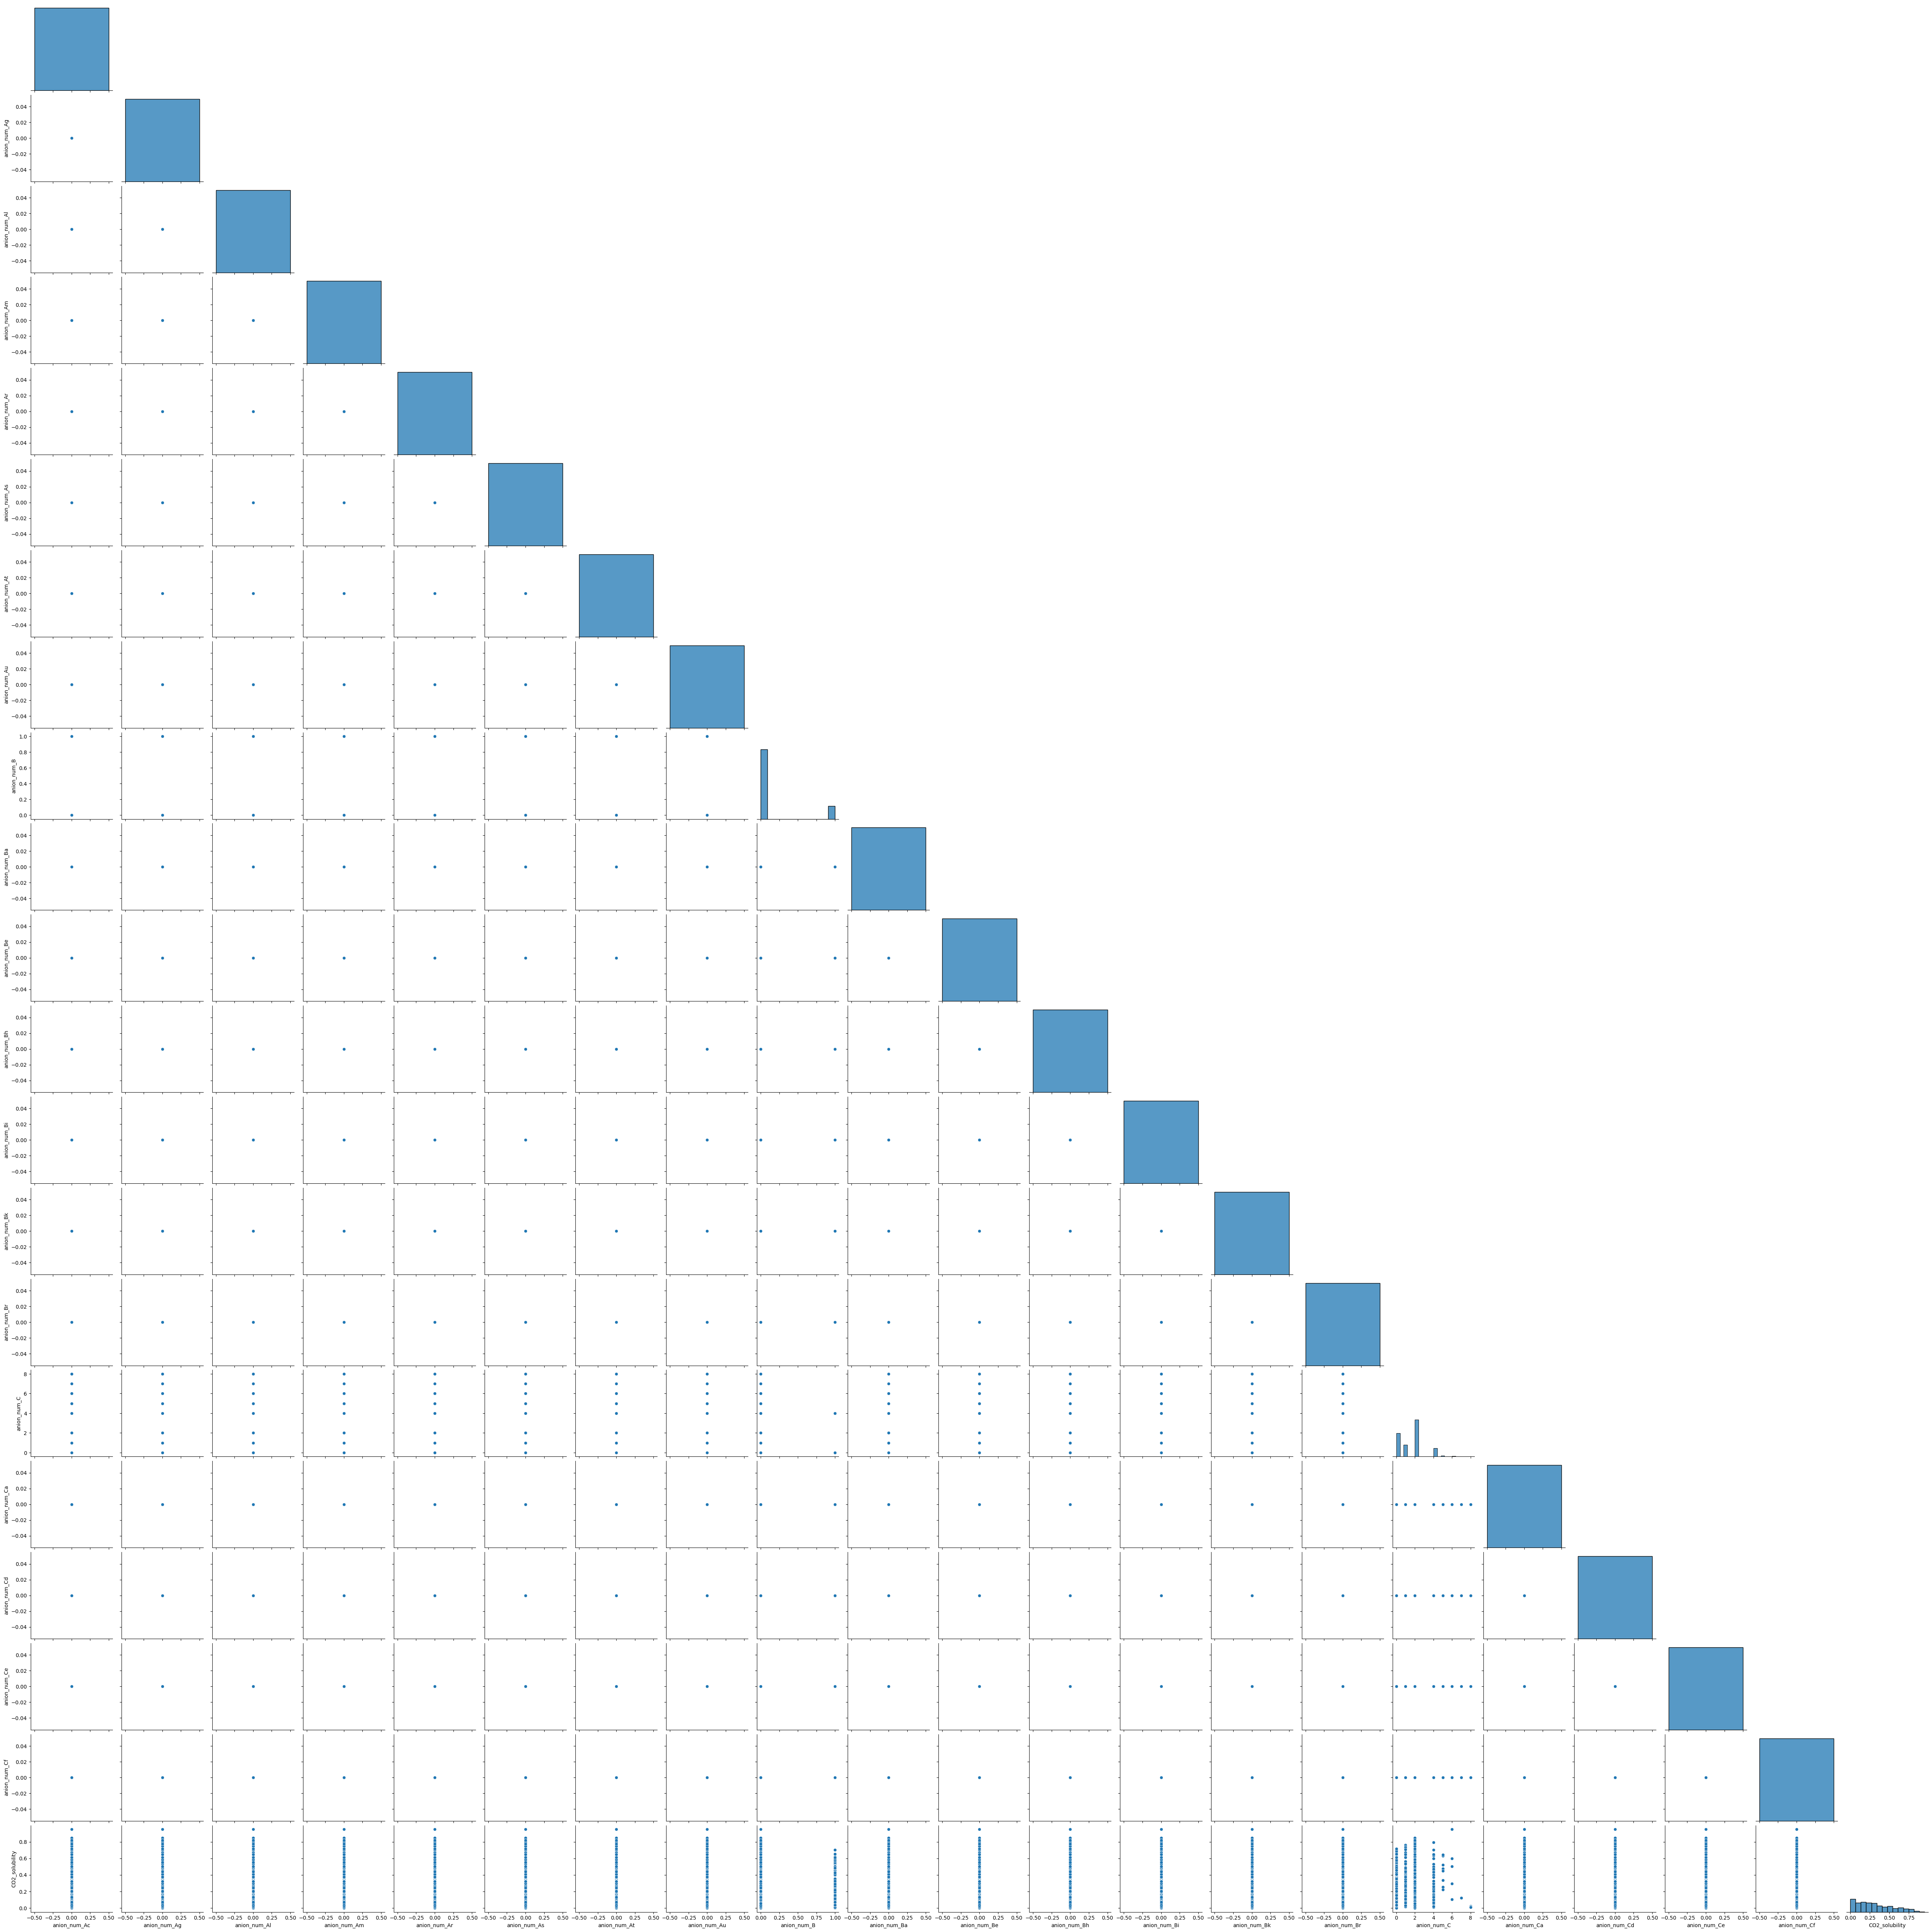

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataset DataFrame
# sns.pairplot(df[feature_cols + [target_col]], corner=True)
# plt.show()

# Sample 1000 rows randomly from the dataset
sampled_df = df.sample(n=1000, random_state=42)

# Select 20 important feature columns plus the target column
subset_cols = feature_cols[:20] + [target_col]

# Generate the pairplot on the sampled subset
sns.pairplot(sampled_df[subset_cols], corner=True)
plt.show()

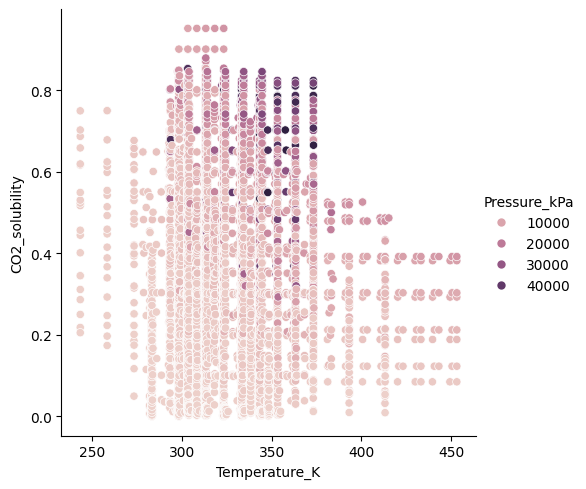

In [18]:
sns.relplot(x='Temperature_K', y='CO2_solubility', hue='Pressure_kPa', data=df)
plt.show()

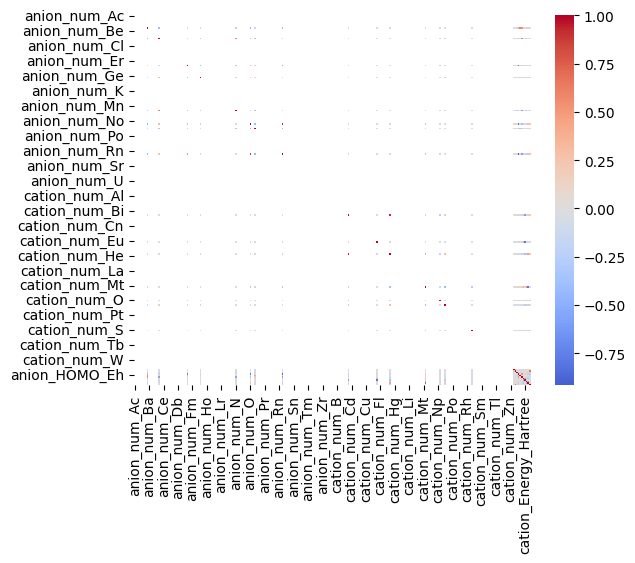

In [19]:
import numpy as np

corr = df[feature_cols + [target_col]].corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.show()

In [20]:

import numpy as np
import random
from bokeh.io import output_notebook, show
from bokeh.models import Div
from bokeh.layouts import column

output_notebook()

# Assume these exist from your earlier code:
# df: your DataFrame
# test_samples: scaled numpy array of features (n_samples, n_features)
# test_samples_original: inverse-sc
# aled original features (n_samples, n_features)
# feature_cols: list of feature names
# y_val: true CO2_solubility values (numpy array)
# model: your trained TensorFlow model

# Pick a random sample index
random_idx = random.randint(0, len(X_val) - 1)
X_val_original = scaler.inverse_transform(X_val)

# Prepare input display
inputs_html = "<b>Random Sample Inputs:</b><br>"
for col_name, value in zip(feature_cols, X_val_original[random_idx]):
    if (col_name.startswith("cation") or col_name.startswith("anion")) and abs(value) < 1e-6:
        continue
    display_value = 0 if abs(value) < 1e-6 else value
    inputs_html += f"{col_name}: {display_value:.4f} <br>"

input_div = Div(text=inputs_html)

# Run model prediction
input_data = X_val[random_idx].reshape(1, -1)
prediction = model.predict(input_data)[0][0]
actual = y_val[random_idx]

output_html = (
    f"<b>Predicted CO2_solubility:</b> {prediction:.4f}<br>"
    f"<b>Actual CO2_solubility:</b> {actual:.4f}<br>"
    f"Sample index: {random_idx + 1} / {len(X_val)}"
)

output_div = Div(text=output_html)

layout = column(input_div, output_div)
show(layout)

Loading BokehJS ...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
